In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
import os
import datetime as dt
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
from keras.models import Sequential
from keras.layers import Dropout, Dense
from sklearn.utils import shuffle
import sys
import talos

Using TensorFlow backend.
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py

In [79]:
# Changes the font parameters for the charts
params = {'legend.fontsize': 14,
         'axes.labelsize': 16,
         'axes.titlesize': 16,
         'xtick.labelsize': 10,
         'ytick.labelsize': 10}
plt.rcParams.update(params)

In [80]:
params = {}

In [81]:
## Change to the 'Datasets directory'
gold_col = 'GOLDAMGBDollarD228NLBM' # 'GOLD_shift' 
initial_dir = os.getcwd()
data_path = os.path.join(os.getcwd(), "data")

In [108]:
hml_list = ['high', 'mid', 'low']

In [109]:
for i in hml_list:

    ## Import the train and test dataframes. Drop the 'dateRep' column as it is not need for the prediciton.
    train_X = pd.read_csv(os.path.join(data_path, "train", 'train_x_' + i + '.csv'), index_col=0).sample(frac=1, random_state=1)
    train_y = pd.read_csv(os.path.join(data_path, "train", 'train_y_' + i + '.csv'), index_col=0).sample(frac=1, random_state=1)
    ## '.sample' randomises the dataframe as the validation test below will take the bottom 20% of the data
    ## 'frac=1' means it will use all the data and 'random_state=1' keeps the resample consistent between df's
    test_x = pd.read_csv(os.path.join(data_path, "test", 'test_x_' + i + '.csv'), index_col=0).sample(frac=1, random_state=1)
    test_y = pd.read_csv(os.path.join(data_path, "test", 'test_y_' + i + '.csv'), index_col=0).sample(frac=1, random_state=1)

    ## Initialise Scalars so that data is normalised to 1.
    sc_x = StandardScaler()
    sc_y = StandardScaler()
    ## Normalise the data using the scalar.
    X_train = sc_x.fit_transform(train_X)
    X_test = sc_x.transform(test_x)

    y_train = sc_y.fit_transform(train_y)
    y_test = sc_y.transform(test_y)
    
    
    ## Calculate the number of input 'test' columns.
    input_neuron = len(test_x.columns)
    
    ## Setup the model for training, parameters here can and should be adjusted to create the best model.
    classifier = Sequential()
    classifier.add(Dense(output_dim = 18, init = 'uniform', activation = 'relu', input_dim = input_neuron))
    classifier.add(Dense(output_dim = 6, init = 'uniform', activation = 'relu'))
    classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'linear'))

    classifier.compile(optimizer = 'SGD', loss = 'mean_squared_error', metrics = ["mae"])
    ## '.fit' starts the training. 30 seconds to 2 minutes to run.
    classifier.fit(X_train, y_train, batch_size = 32, nb_epoch = 1000, validation_split= 0.2)


    model_path = os.path.join(os.getcwd(), "model")
    # Check if the relevant folders exist and create them if not
    if os.path.exists(model_path) is False:
        os.mkdir(model_path)
    # Export the model for future use to that you don't need to spend time training the model again
    pickle.dump(classifier, open(os.path.join(model_path, "ReinNN_" + i + ".pkl"), "wb"))

Train on 451 samples, validate on 113 samples
Epoch 1/1000
451/451 [==============================] - 0s 638us/step - loss: 0.9842 - mae: 0.7214 - val_loss: 1.0620 - val_mae: 0.7280
Epoch 2/1000
451/451 [==============================] - 0s 41us/step - loss: 0.9839 - mae: 0.7139 - val_loss: 1.0624 - val_mae: 0.7382
Epoch 3/1000
451/451 [==============================] - 0s 38us/step - loss: 0.9835 - mae: 0.7235 - val_loss: 1.0619 - val_mae: 0.7344
Epoch 4/1000
451/451 [==============================] - 0s 41us/step - loss: 0.9836 - mae: 0.7212 - val_loss: 1.0617 - val_mae: 0.7329
Epoch 5/1000
451/451 [==============================] - 0s 43us/step - loss: 0.9834 - mae: 0.7212 - val_loss: 1.0614 - val_mae: 0.7299
Epoch 6/1000
451/451 [==============================] - 0s 41us/step - loss: 0.9835 - mae: 0.7159 - val_loss: 1.0616 - val_mae: 0.7376
Epoch 7/1000
451/451 [==============================] - 0s 43us/step - loss: 0.9829 - mae: 0.7241 - val_loss: 1.0618 - val_mae: 0.7414
Epoch 8/

In [87]:
"""model_path = os.path.join(data_folder, "model")
# Import the exported model in future runs using the greyed out line below (remove the hastag)
model = pickle.load(open(os.path.join(model_path, "ReinNN.pkl"), "rb"))"""

'model_path = os.path.join(data_folder, "model")\n# Import the exported model in future runs using the greyed out line below (remove the hastag)\nmodel = pickle.load(open(os.path.join(model_path, "ReinNN.pkl"), "rb"))'

In [116]:
for i in hml_list:

    ## Import the train and test dataframes. Drop the 'dateRep' column as it is not need for the prediciton.
    train_X = pd.read_csv(os.path.join(data_path, "train", 'train_x_' + i + '.csv'), index_col=0).sample(frac=1, random_state=1)
    train_y = pd.read_csv(os.path.join(data_path, "train", 'train_y_' + i + '.csv'), index_col=0).sample(frac=1, random_state=1)
    ## '.sample' randomises the dataframe as the validation test below will take the bottom 20% of the data
    ## 'frac=1' means it will use all the data and 'random_state=1' keeps the resample consistent between df's
    test_x = pd.read_csv(os.path.join(data_path, "test", 'test_x_' + i + '.csv'), index_col=0).sample(frac=1, random_state=1)
    test_y = pd.read_csv(os.path.join(data_path, "test", 'test_y_' + i + '.csv'), index_col=0).sample(frac=1, random_state=1)

    ## Initialise Scalars so that data is normalised to 1.
    sc_x = StandardScaler()
    sc_y = StandardScaler()
    ## Normalise the data using the scalar.
    X_train = sc_x.fit_transform(train_X)
    X_test = sc_x.transform(test_x)

    y_train = sc_y.fit_transform(train_y)
    y_test = sc_y.transform(test_y)

    # Calculate the predicted deaths according to the neural net model
    test_x["gold_pred"] = sc_y.inverse_transform(classifier.predict(X_test))
    # Calculate the predicted deaths according to the neural net model
    train_X["gold_pred"] = sc_y.inverse_transform(classifier.predict(X_train))
    #df1 = pd.concat([test_x, train_X], axis=1)
    df= train_X.merge(train_y,left_index=True, right_index=True)
    # We merge the test dataframes together
    df1 = test_x.merge(test_y, left_index=True, right_index=True)
    # We append the test data to the train data
    df = df.append(df1)
    
    # Again read in the 'covid19_df' as df_global
    df_global = pd.read_csv(os.path.join(os.getcwd(), "Data_Export", "gold_df_" + i + ".csv"), index_col=0)
    # Merge in the 'deaths_pred' prediction column to compare to the real data
    df_global = df_global.merge(df["gold_pred"], left_index=True, right_index=True, how='left')
    df_global.index = pd.to_datetime(df_global.index)
    
    df_global.to_csv(os.path.join(os.getcwd(), "data_export", "gold_df_" + i + ".csv"))
    


In [135]:
# Import the three complete datasets.
lmh_list = [df_global_high, df_global_mid, df_global_low]
df_global_high = pd.read_csv(os.path.join(os.getcwd(), "Data_Export", "gold_df_high.csv"), index_col=0)
df_global_high.index = pd.to_datetime(df_global_high.index)
df_global_mid = pd.read_csv(os.path.join(os.getcwd(), "Data_Export", "gold_df_mid.csv"), index_col=0)
df_global_mid.index = pd.to_datetime(df_global_mid.index)
df_global_low = pd.read_csv(os.path.join(os.getcwd(), "Data_Export", "gold_df_low.csv"), index_col=0)
df_global_low.index = pd.to_datetime(df_global_low.index)

In [132]:
# Compute the prediction error
df_global_high['gold_pred_error'] = df_global_high['GOLDAMGBDollarD228NLBM'] - df_global_high['gold_pred']
# Compute the cumulative error for gold
df_global_high['cumulative_error'] = df_global_high['gold_pred_error'].cumsum()

df_global_mid['gold_pred_error'] = df_global_mid['GOLDAMGBDollarD228NLBM'] - df_global_mid['gold_pred']
df_global_mid['cumulative_error'] = df_global_mid['gold_pred_error'].cumsum()
df_global_low['gold_pred_error'] = df_global_low['GOLDAMGBDollarD228NLBM'] - df_global_low['gold_pred']
df_global_low['cumulative_error'] = df_global_low['gold_pred_error'].cumsum()

Text(0, 0.5, 'Price (US $)')

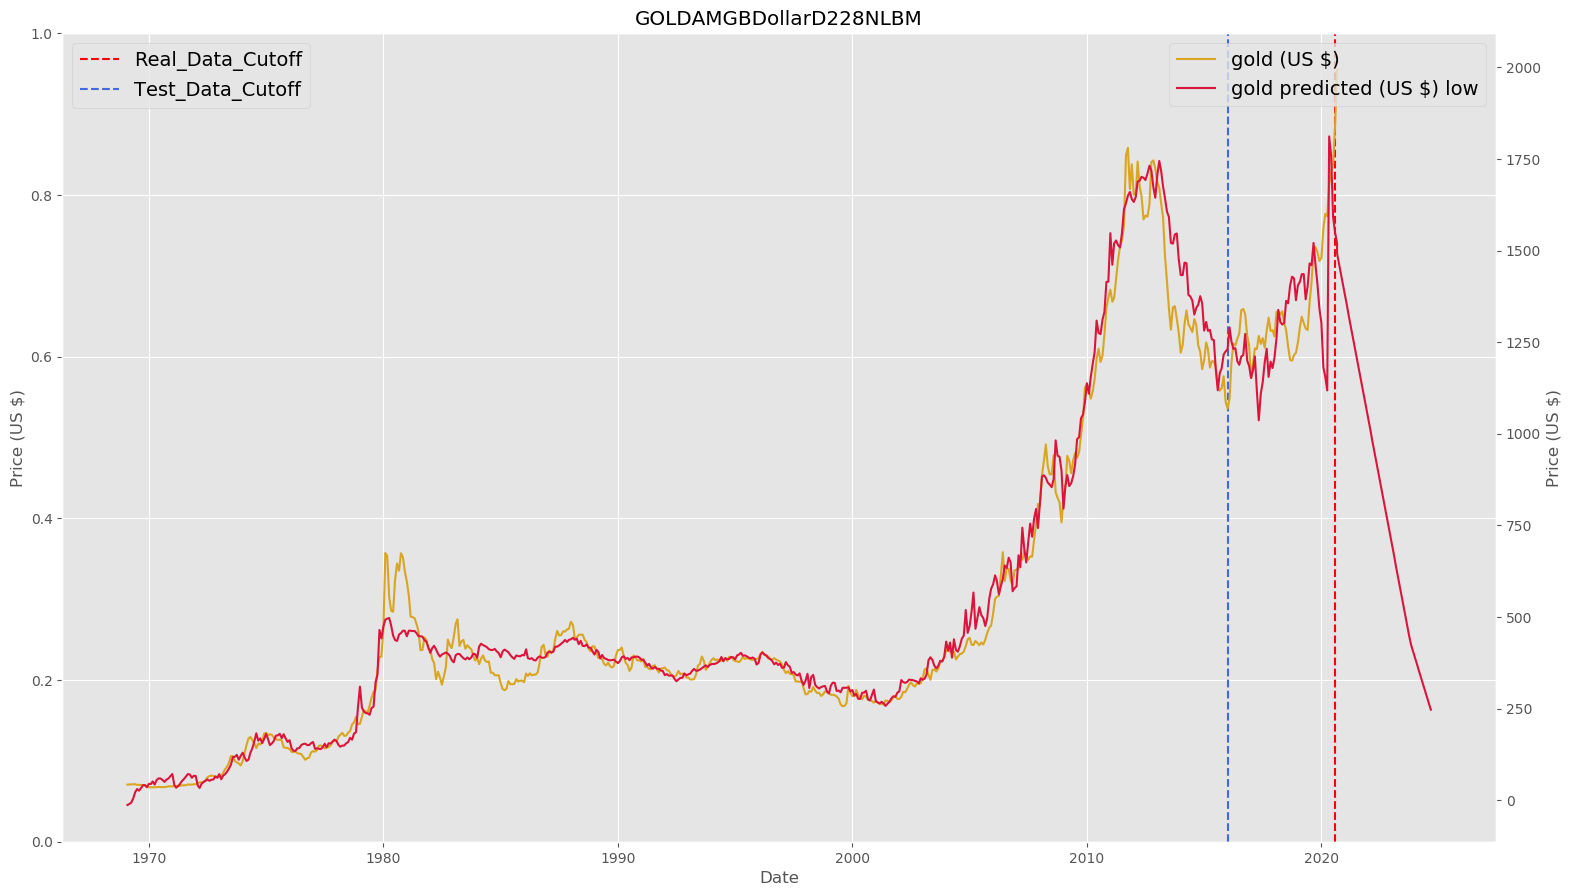

In [139]:
#for m, n in zip(hml_list, lmh_list): 
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()
j = 'GOLDAMGBDollarD228NLBM'
k = 'gold_pred_error'
l = 'gold_pred'

#ax1.plot(df_global.index, df_global[k], label=k, c='mediumturquoise')
ax1.axvline(x=dt.date(2020, 8, 1), linestyle='--', color='red', label='Real_Data_Cutoff')
ax1.axvline(x=dt.date(2016, 1, 1), linestyle='--', color='royalblue', label='Test_Data_Cutoff')

ax2 = ax1.twinx()
ax2.plot(df_global_high.index, df_global_high[j], label='gold (US $)', c='goldenrod')
ax2.plot(df_global_high.index, df_global_high[l], label='gold predicted (US $) ' + m, c='crimson')

#ax1.ylim(0, 15)
plt.title(j)
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=2)
ax2.legend(loc=1)
fig.set_size_inches(18.5, 10.5)

ax1.set_xlabel('Date')
ax1.set_ylabel('Price (US $)')
ax2.set_ylabel('Price (US $)')
#plt.savefig('cumulative_error_20_countries_XGB_dpi300.jpeg', dpi=300)

In [93]:
## Calculate the mean absolute error and R2 scores for the predicted vs real test data.
print(f"Test data MAE score: {np.round(mean_absolute_error(df1.loc[df1.index < '2020-08-31'][gold_col], df1.loc[df1.index < '2020-08-31']['gold_pred']))}")
print(f"Test data R2 score: {np.round(r2_score(df1.loc[df1.index < '2020-08-31'][gold_col], df1.loc[df1.index < '2020-08-31']['gold_pred']))}")
## Calculate the mean absolute error and R2 scores for the predicted vs real all data.
print(f"All Data MAE score: {np.round(mean_absolute_error(df_global.loc[df_global.index < '2020-08-31'][gold_col], df_global.loc[df_global.index < '2020-08-31']['gold_pred']))}")
print(f"All Data R2 score: {np.round(r2_score(df_global.loc[df_global.index < '2020-08-31'][gold_col], df_global.loc[df_global.index < '2020-08-31']['gold_pred']))}")

Test data MAE score: 501.0
Test data R2 score: -10.0
All Data MAE score: 81.0
All Data R2 score: 1.0


Text(0, 0.5, 'Price (US $)')

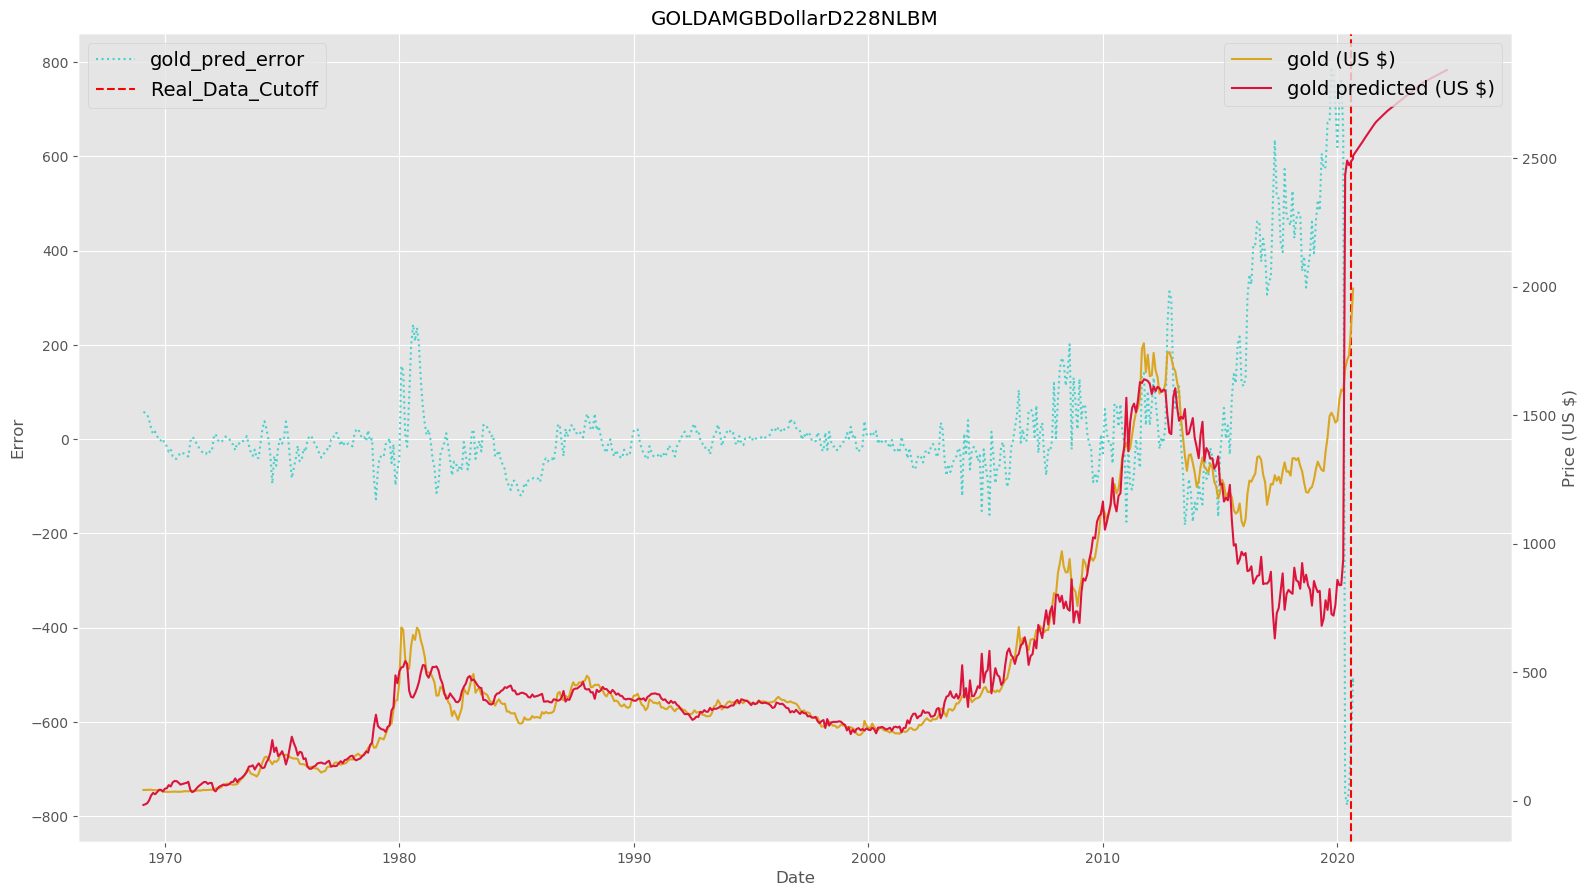

In [102]:
# Visualising the Linear Regression results.
fig, ax1 = plt.subplots()
j = 'GOLDAMGBDollarD228NLBM'
k = 'gold_pred_error'
l = 'gold_pred'

ax1.plot(df_global.index, df_global[k], label=k, c='mediumturquoise', linestyle=':')
ax1.axvline(x=dt.date(2020, 8, 1), linestyle='--', color='red', label='Real_Data_Cutoff')


ax2 = ax1.twinx()
ax2.plot(df_global.index, df_global[j], label='gold (US $)', c='goldenrod')
ax2.plot(df_global.index, df_global[l], label='gold predicted (US $)', c='crimson')

#ax1.ylim(0, 15)
plt.title(j)
plt.xlabel('Date')
plt.grid()
ax1.legend(loc=2)
ax2.legend(loc=1)
fig.set_size_inches(18.5, 10.5)

ax1.set_xlabel('Date')
ax1.set_ylabel('Error')
ax2.set_ylabel('Price (US $)')
#plt.savefig('cumulative_error_20_countries_XGB_dpi300.jpeg', dpi=300)

In [95]:
## Check for the directory and output the df_global dataframe.
if os.path.exists(os.path.join(os.getcwd(), "model_predictions")) is False:
    os.mkdir(os.path.join(os.getcwd(), "model_predictions"))
df_global.to_csv(os.path.join(os.getcwd(), "model_predictions", "Rein_nn_predictions.csv"))

In [96]:
plt.style.use("ggplot")

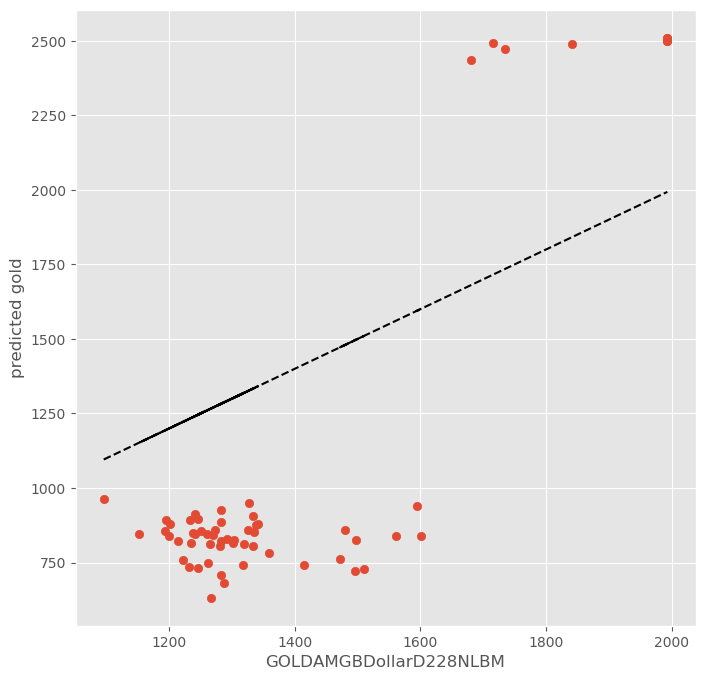

In [97]:
## Plot deaths vs predicted.
plt.figure(figsize=(8, 8))
plt.scatter(df1.GOLDAMGBDollarD228NLBM, df1.gold_pred)
plt.plot(df1.GOLDAMGBDollarD228NLBM, df1.GOLDAMGBDollarD228NLBM, color="black", linestyle="--")
plt.xlabel("GOLDAMGBDollarD228NLBM")
plt.ylabel("predicted gold")
plt.show()

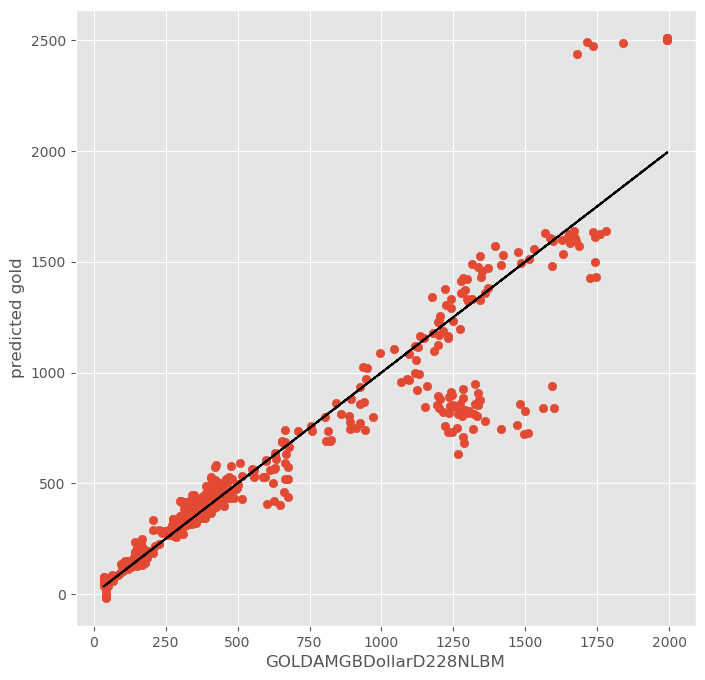

In [98]:
## Plot deaths vs predicted.
plt.figure(figsize=(8, 8))
plt.scatter(df_global.GOLDAMGBDollarD228NLBM, df_global.gold_pred)
plt.plot(df_global.GOLDAMGBDollarD228NLBM, df_global.GOLDAMGBDollarD228NLBM, color="black", linestyle="--")
plt.xlabel("GOLDAMGBDollarD228NLBM")
plt.ylabel("predicted gold")
plt.show()

In [74]:
plt.rcdefaults()